# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 597


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?appid="+weather_api_key+"&units=metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'{url}&q={city}'
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | sarangani
Processing Record 2 of Set 1 | san antonio de pale
Processing Record 3 of Set 1 | sitka
Processing Record 4 of Set 1 | ajdabiya
Processing Record 5 of Set 1 | adamstown
Processing Record 6 of Set 1 | kapuskasing
Processing Record 7 of Set 1 | usogorsk
Processing Record 8 of Set 1 | port alfred
Processing Record 9 of Set 1 | grytviken
Processing Record 10 of Set 1 | hermanus
Processing Record 11 of Set 1 | ilulissat
Processing Record 12 of Set 1 | santa maria da vitoria
Processing Record 13 of Set 1 | isokyro
Processing Record 14 of Set 1 | hawaiian paradise park
Processing Record 15 of Set 1 | nagqu
Processing Record 16 of Set 1 | edinburgh of the seven seas
Processing Record 17 of Set 1 | woolgoolga
Processing Record 18 of Set 1 | tiksi
Processing Record 19 of Set 1 | geraldton
Processing Record 20 of Set 1 | petropavlovsk-kamchatsky
Processing Record 21 of Set 1 | port lincoln
Process

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          565
Lat           565
Lng           565
Max Temp      565
Humidity      565
Cloudiness    565
Wind Speed    565
Country       565
Date          565
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,sarangani,5.4033,125.4636,27.35,77,23,9.28,PH,1712791178
1,san antonio de pale,-1.4014,5.6325,28.29,81,82,4.54,GQ,1712791096
2,sitka,57.0531,-135.3300,6.94,70,100,5.14,US,1712791046
3,ajdabiya,30.7554,20.2263,15.86,62,0,4.00,LY,1712791179
4,adamstown,-25.0660,-130.1015,22.67,85,100,6.84,PN,1712791006


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,sarangani,5.4033,125.4636,27.35,77,23,9.28,PH,1712791178
1,san antonio de pale,-1.4014,5.6325,28.29,81,82,4.54,GQ,1712791096
2,sitka,57.0531,-135.3300,6.94,70,100,5.14,US,1712791046
3,ajdabiya,30.7554,20.2263,15.86,62,0,4.00,LY,1712791179
4,adamstown,-25.0660,-130.1015,22.67,85,100,6.84,PN,1712791006


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

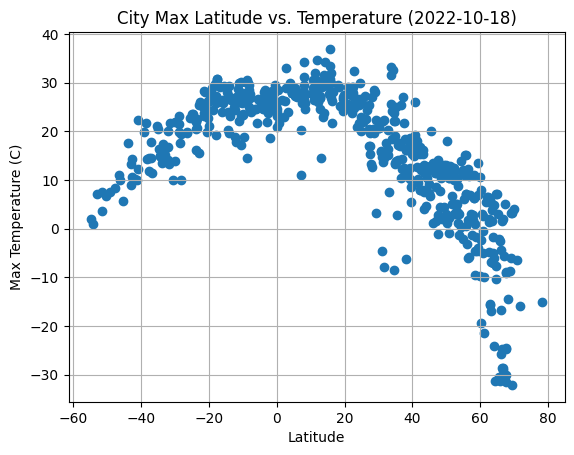

In [14]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"])

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

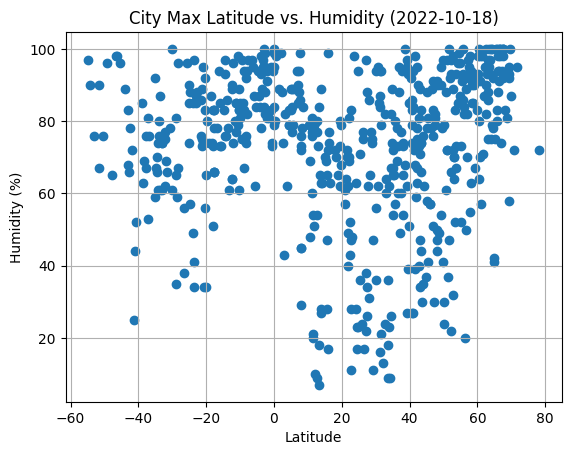

In [15]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"])

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Humidity (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

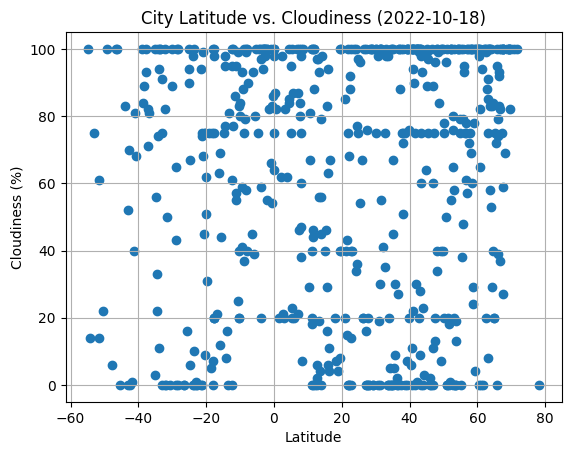

In [16]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"])

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

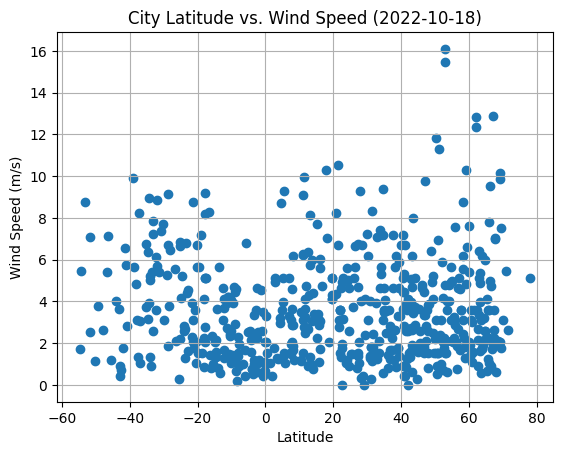

In [17]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"])

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [45]:
# Define a function to create Linear Regression plots
def plotter(x,y,regress_values,line_eq,location,xlabel,ylabel):
    plt.scatter(x, y)
    plt.plot(x,regress_values,"r-")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.annotate(line_eq,location,fontsize=15,color="red")
    return plt

In [46]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"]>0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,sarangani,5.4033,125.4636,27.35,77,23,9.28,PH,1712791178
2,sitka,57.0531,-135.3300,6.94,70,100,5.14,US,1712791046
3,ajdabiya,30.7554,20.2263,15.86,62,0,4.00,LY,1712791179
5,kapuskasing,49.4169,-82.4331,13.05,54,40,4.12,CA,1712791179
6,usogorsk,63.4106,48.6872,1.48,100,100,3.99,RU,1712791079


In [47]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"]<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,san antonio de pale,-1.4014,5.6325,28.29,81,82,4.54,GQ,1712791096
4,adamstown,-25.0660,-130.1015,22.67,85,100,6.84,PN,1712791006
7,port alfred,-33.5906,26.8910,15.10,87,100,0.89,ZA,1712791179
8,grytviken,-54.2811,-36.5092,0.94,90,14,5.44,GS,1712791004
9,hermanus,-34.4187,19.2345,14.89,70,22,8.96,ZA,1712791009


###  Temperature vs. Latitude Linear Regression Plot

R-value: 0.6961601202367583


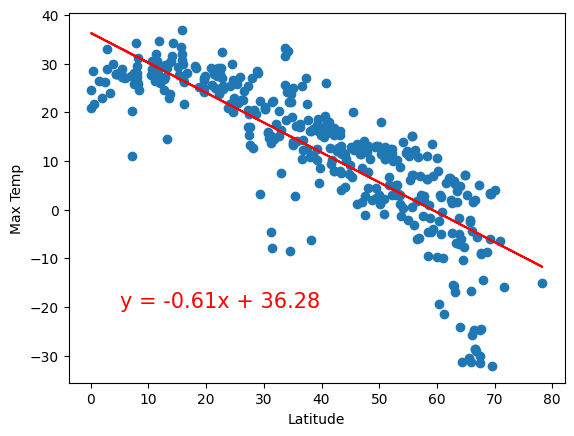

In [48]:
# Linear regression on Northern Hemisphere
(slope, intercept, r_value, p_value, stderr) = linregress(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])
regress_values = northern_hemi_df["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"R-value: {r_value**2}")
plt = plotter(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"],regress_values,line_eq,(5,-20),'Latitude','Max Temp')
plt.show()

R-value: 0.6354995127911505


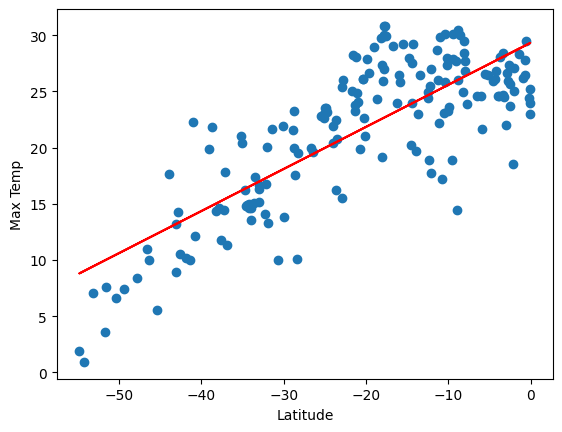

In [49]:
# Linear regression on Southern Hemisphere
(slope, intercept, r_value_south, p_value, stderr) = linregress(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])
regress_values = southern_hemi_df["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"R-value: {r_value_south**2}")
plt=plotter(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"],regress_values,line_eq,(-55,35),'Latitude','Max Temp')
plt.show()

**Discussion about the linear relationship:**
Northern: moderate negative correlation
Southern: moderate positive correlation

### Humidity vs. Latitude Linear Regression Plot

R-value: 0.08604462920272521


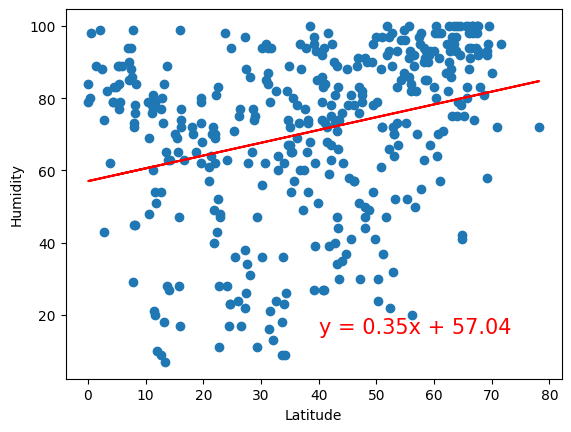

In [37]:
# Northern Hemisphere
(slope, intercept, r_value_humid, p_value, stderr) = linregress(northern_hemi_df["Lat"], northern_hemi_df["Humidity"])
regress_values = northern_hemi_df["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"R-value: {r_value_humid**2}")
plt=plotter(northern_hemi_df["Lat"], northern_hemi_df["Humidity"],regress_values,line_eq,(40,15),'Latitude','Humidity')
plt.show()

R-value: 0.09036954480785045


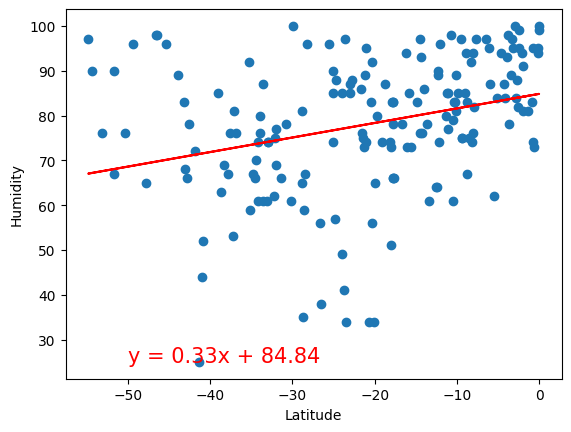

In [38]:
# Southern Hemisphere
(slope, intercept, r_value_humid_south, p_value, stderr) = linregress(southern_hemi_df["Lat"], southern_hemi_df["Humidity"])
regress_values = southern_hemi_df["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"R-value: {r_value_humid_south**2}")
plt=plotter(southern_hemi_df["Lat"], southern_hemi_df["Humidity"],regress_values,line_eq,(-50,25),'Latitude','Humidity')
plt.show()

**Discussion about the linear relationship:** 
Both northern and southern hemispheres show weak positive correlations

### Cloudiness vs. Latitude Linear Regression Plot

R-value: 0.02514307855096638


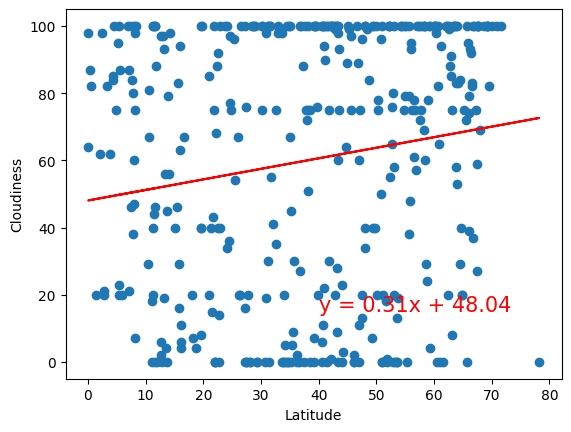

In [39]:
# Northern Hemisphere
(slope, intercept, r_value_cloud, p_value, stderr) = linregress(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"])
regress_values = northern_hemi_df["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"R-value: {r_value_cloud**2}")
plt=plotter(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"],regress_values,line_eq,(40,15),'Latitude','Cloudiness')
plt.show()

R-value: 0.050303083145439756


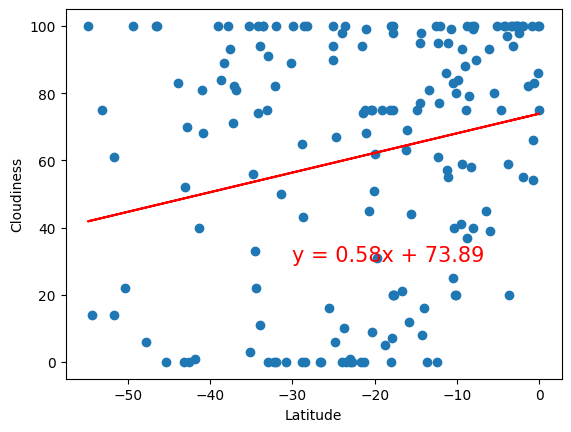

In [40]:
# Southern Hemisphere
(slope, intercept, r_value_cloud_south, p_value, stderr) = linregress(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"])
regress_values = southern_hemi_df["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"R-value: {r_value_cloud_south**2}")
plt=plotter(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"],regress_values,line_eq,(-30,30),'Latitude','Cloudiness')
plt.show()

**Discussion about the linear relationship:** 
Weak/moderate positive correlation for both

### Wind Speed vs. Latitude Linear Regression Plot

R-value: 0.0037018170665853566


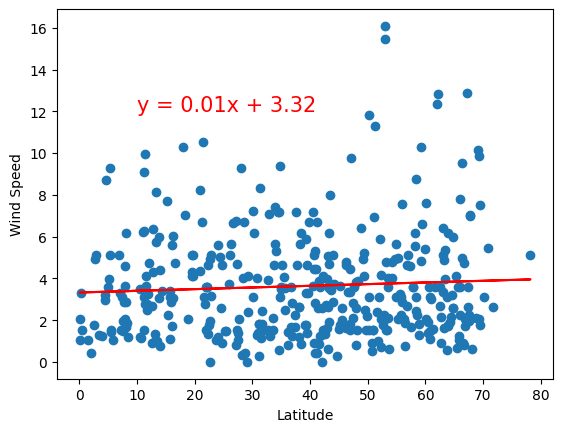

In [41]:
# Northern Hemisphere
(slope, intercept, r_value_wind, p_value, stderr) = linregress(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"])
regress_values = northern_hemi_df["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"R-value: {r_value_wind**2}")
plt = plotter(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"],regress_values,line_eq,(10,12),'Latitude','Wind Speed')
plt.show()

R-value: 0.14091162979774574


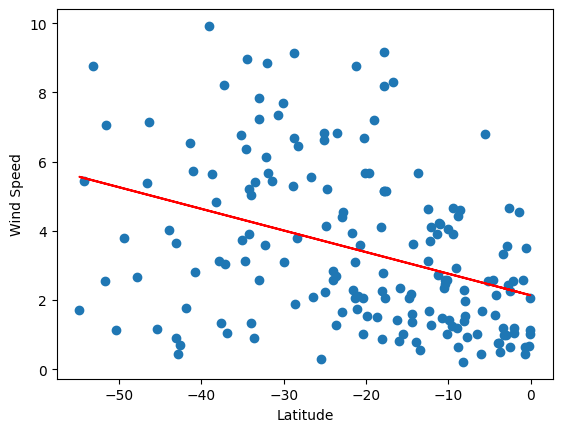

In [43]:
# Southern Hemisphere
(slope, intercept, r_value_wind_south, p_value, stderr) = linregress(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"])
regress_values = southern_hemi_df["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"R-value: {r_value_wind_south**2}")
plt = plotter(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"],regress_values,line_eq,(-50,12),'Latitude','Wind Speed')
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE
Northern: no correlation
Southern: weak negative correlation